In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def make_hist(r, r1):
    t = 12
    sns.histplot(r [:, :-t].sum(axis=1), bins = 51, kde=True)
    sns.histplot(r1[:, :-t].sum(axis=1), bins = 51, kde=True)
    plt.title('Histogram of rewards for 1000 episodes')
    for e in [r, r1]:
        plt.axvline (e[:, :-t].sum(axis=1).mean(), color='r', linestyle='-', label = 'mean' if e is r else None)
        plt.axvline (e[:, :-t].sum(axis=1).mean() + e[:, :-t].sum(axis=1).std(), color='r', linestyle='--', label = 'std' if e is r else None)
        plt.axvline (e[:, :-t].sum(axis=1).mean() - e[:, :-t].sum(axis=1).std(), color='r', linestyle='--')
        #plt.axvline (e[:, :-12].sum(axis=1).mean() + 2*e[:,: -12].sum(axis=1).std(), color='r', linestyle='-.')
        #plt.axvline (e[:, :-12].sum(axis=1).mean() - 2*e[:,: -12].sum(axis=1).std(), color='r', linestyle='-.', label = r'2$\times$std')
        plt.axvline(np.median(e[:, :-t].sum(axis=1)), color='b', linestyle='-.', label='median' if e is r else None)
    plt.axvline(0, color='g')
    plt.legend()
    plt.show()

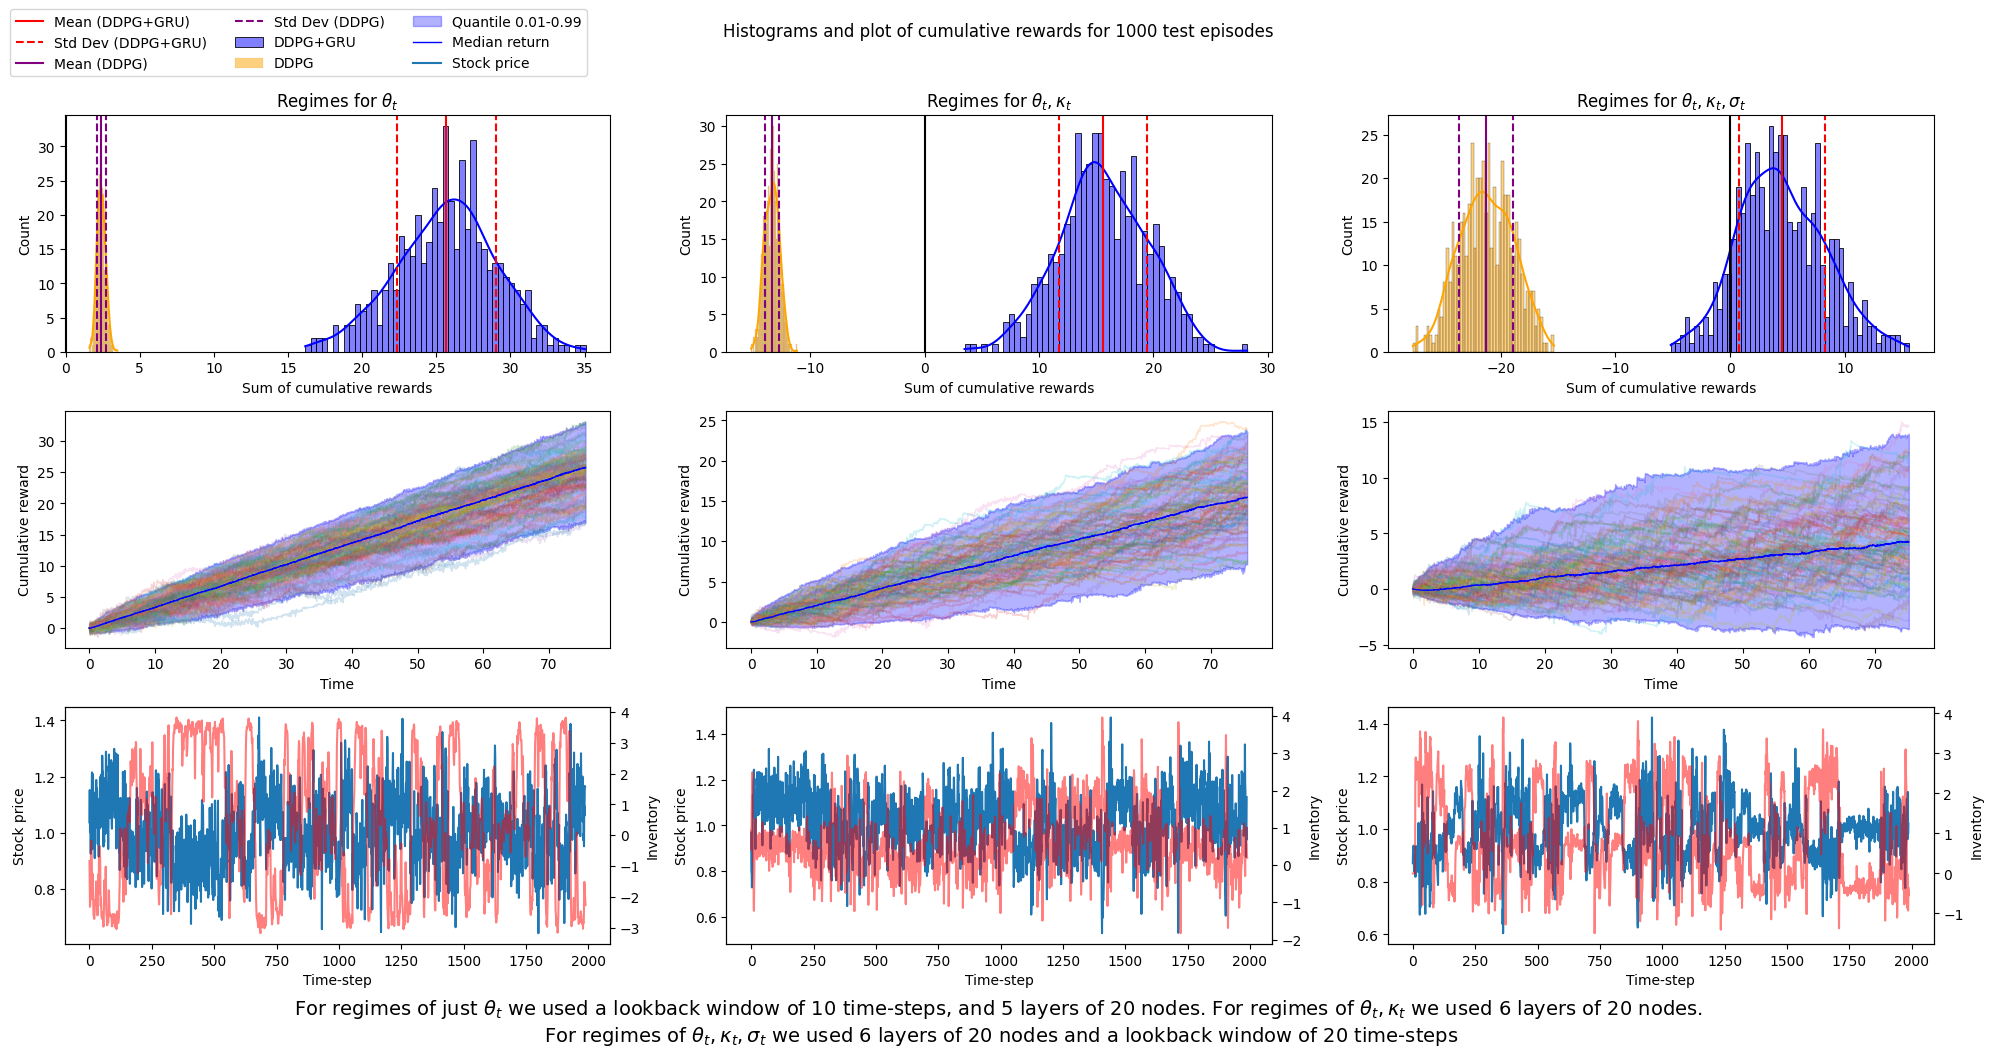

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_hist(r, r1, ax, title, t):
    sns.histplot(r[:, :-t].sum(axis=1), bins=51, kde=True, ax=ax, color='blue', label='DDPG+GRU')
    sns.histplot(r1[:, :-t].sum(axis=1), bins=51, kde=True, ax=ax, color='orange', label='DDPG')
    ax.set_title(title)
    ax.axvline(r[:, :-t].sum(axis=1).mean(), color='red', linestyle='-', label='Mean (DDPG+GRU)')
    ax.axvline(r[:, :-t].sum(axis=1).mean() + r[:, :-t].sum(axis=1).std(), color='red', linestyle='--', label='Std Dev (DDPG+GRU)')
    ax.axvline(r[:, :-t].sum(axis=1).mean() - r[:, :-t].sum(axis=1).std(), color='red', linestyle='--')
    #ax.axvline(np.median(r[:, :-t].sum(axis=1)), color='blue', linestyle='-.', label='Median (DDPG+GRU)')
    
    ax.axvline(r1[:, :-t].sum(axis=1).mean(), color='purple', linestyle='-', label='Mean (DDPG)')
    ax.axvline(r1[:, :-t].sum(axis=1).mean() + r1[:, :-t].sum(axis=1).std(), color='purple', linestyle='--', label='Std Dev (DDPG)')
    ax.axvline(r1[:, :-t].sum(axis=1).mean() - r1[:, :-t].sum(axis=1).std(), color='purple', linestyle='--')
    #ax.axvline(np.median(r1[:, :-t].sum(axis=1)), color='orange', linestyle='-.', label='Median (DDPG)')
    
    ax.axvline(0, color='black', linestyle='-')
    ax.set_xlabel('Sum of cumulative rewards')

def plot_cumulative_rewards(r, ax, d, title):
    x = np.zeros((r.shape[0], r.shape[1] - d))
    num_it = r.shape[0]
    for i in range(1, num_it):
        x[i, ...] = np.cumsum(r[i, :-d], axis=0)
    qtl = np.quantile(x, [0.01, 0.5, 0.99], axis=0)
    t = np.arange(x.shape[1]) * 0.038
    for i in range(1, 100):
        ax.plot(t, np.cumsum(r[i, :-d], axis=0), linewidth=1, alpha=0.2)
    ax.fill_between(t, qtl[0], qtl[2], color='b', alpha=0.3, label='Quantile 0.01-0.99')
    ax.plot(t, qtl[1], color='b', linewidth=1, label='Median return')
    ax.set_title('Cumulative rewards for 1000 trading episodes using GRU+DDPG')
    ax.set_xlabel('Time')
    ax.set_ylabel('Cumulative reward')
    ax.set_title(title)

def plot_inv_stock(S, I, ax, title, d):
    ax.plot(S[:, 10:-2].flatten(), label='Stock price')
    ax.set_ylabel('Stock price')
    ax.set_xlabel('Time-step')
    #ax.legend(loc='upper left')
    ax1 = ax.twinx()
    ax1.plot(I[:, 10:-2].flatten(), color='red', label='Inventory', alpha=0.5)
    ax1.set_ylabel('Inventory')
    #ax1.legend(loc='upper right')
    ax.set_title(title)


# Load data
r  = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob/r.npy')
r1 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob/model-just-ddpg/just_theta/r.npy')
r2 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob-all-pmt-chnge/just_k/r.npy')
r3 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob-all-pmt-chnge/just_k/just_ddpg/r.npy')
r4 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob-all-pmt-chnge/both_k_sigma/r_1.npy')
r5 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob-all-pmt-chnge/both_k_sigma/just_ddpg/r.npy')

S1 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob/S.npy')
I1 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob/I.npy')
S2 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob-all-pmt-chnge/just_k/S.npy')
I2 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob-all-pmt-chnge/just_k/I.npy')
S3 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob-all-pmt-chnge/both_k_sigma/S.npy')
I3 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob-all-pmt-chnge/both_k_sigma/I.npy')

# Create figure and subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 10))

# Create histograms
titles = [r'Regimes for $\theta_t$', r'Regimes for $\theta_t, \kappa_t$', r'Regimes for $\theta_t, \kappa_t, \sigma_t$']
make_hist(r,  r1, axs[0, 0], titles[0] ,t=12)
make_hist(r2, r3, axs[0, 1], titles[1] ,t=12)
make_hist(r4, r5, axs[0, 2], titles[2] ,t=22)

plot_cumulative_rewards(r,   axs[1, 0], d=12, title = '')
plot_cumulative_rewards(r2,  axs[1, 1], d=12, title = '')
plot_cumulative_rewards(r4,  axs[1, 2], d=22, title = '')

plot_inv_stock(S1, I1, axs[2, 0], '', d=12)
plot_inv_stock(S2, I2, axs[2, 1], '', d=12)
plot_inv_stock(S3, I3, axs[2, 2], '', d=22)

# Collect handles and labels from all axes
handles, labels = [], []
for ax in axs.flat:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:  # Avoid duplicates
            handles.append(handle)
            labels.append(label)

# Create a single legend for the whole figure
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.15, 1.))

fig.suptitle('Histograms and plot of cumulative rewards for 1000 test episodes')

plt.figtext(0.5, -0.02, 'For regimes of just $\\theta_t$ we used a lookback window of 10 time-steps, and 5 layers of 20 nodes. For regimes of $\\theta_t, \\kappa_t$ we used 6 layers of 20 nodes.\n For regimes of $\\theta_t, \\kappa_t, \\sigma_t$ we used 6 layers of 20 nodes and a lookback window of 20 time-steps', ha='center', va='center', fontsize=14)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [24]:
theta1 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob/theta_post.npy')
theta1

array([[0.04747975, 0.31621832, 0.63630193],
       [0.03279031, 0.12082368, 0.846386  ],
       [0.03016207, 0.08802578, 0.8818122 ],
       ...,
       [0.10482274, 0.7147114 , 0.18046583],
       [0.08592575, 0.67144334, 0.24263096],
       [0.07407445, 0.611039  , 0.31488654]], dtype=float32)

In [43]:
theta1.shape

(1990, 3)

C:\Users\macri\AppData\Local\Temp\ipykernel_24276\2566942679.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


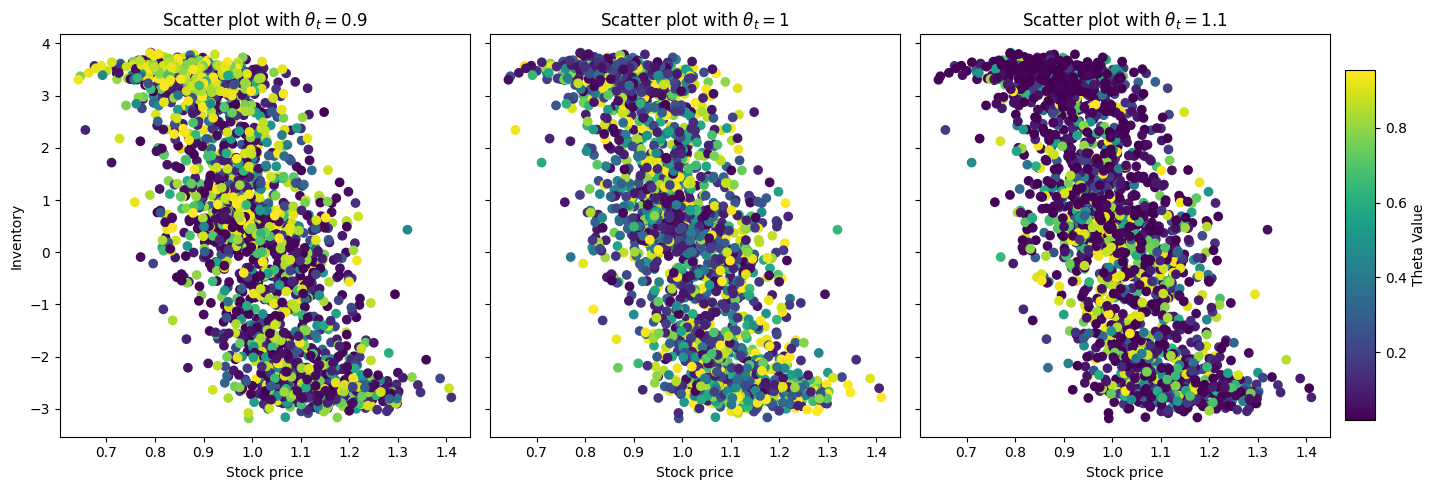

In [53]:
# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Create scatter plots
sc1 = axs[0].scatter(S1[:,10:].flatten(), I1[:, 12:].flatten(), c=theta1[:, 0])
axs[0].set_xlabel('Stock price')
axs[0].set_ylabel('Inventory')
axs[0].set_title(r'Scatter plot with $\theta_t = 0.9$')

sc2 = axs[1].scatter(S1[:,10:].flatten(), I1[:, 12:].flatten(), c=theta1[:, 1])
axs[1].set_xlabel('Stock price')
axs[1].set_title(r'Scatter plot with $\theta_t = 1$')

sc3 = axs[2].scatter(S1[:,10:].flatten(), I1[:, 12:].flatten(), c=theta1[:, 2])
axs[2].set_xlabel('Stock price')
axs[2].set_title(r'Scatter plot with $\theta_t = 1.1$')

# Adjust layout to make room for the colorbar
plt.subplots_adjust(right=0.85)

# Create a single colorbar
cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(sc1, cax=cbar_ax)
cbar.set_label('Theta Value')

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])

# Show the plot
plt.show()

C:\Users\macri\AppData\Local\Temp\ipykernel_24276\3468093375.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


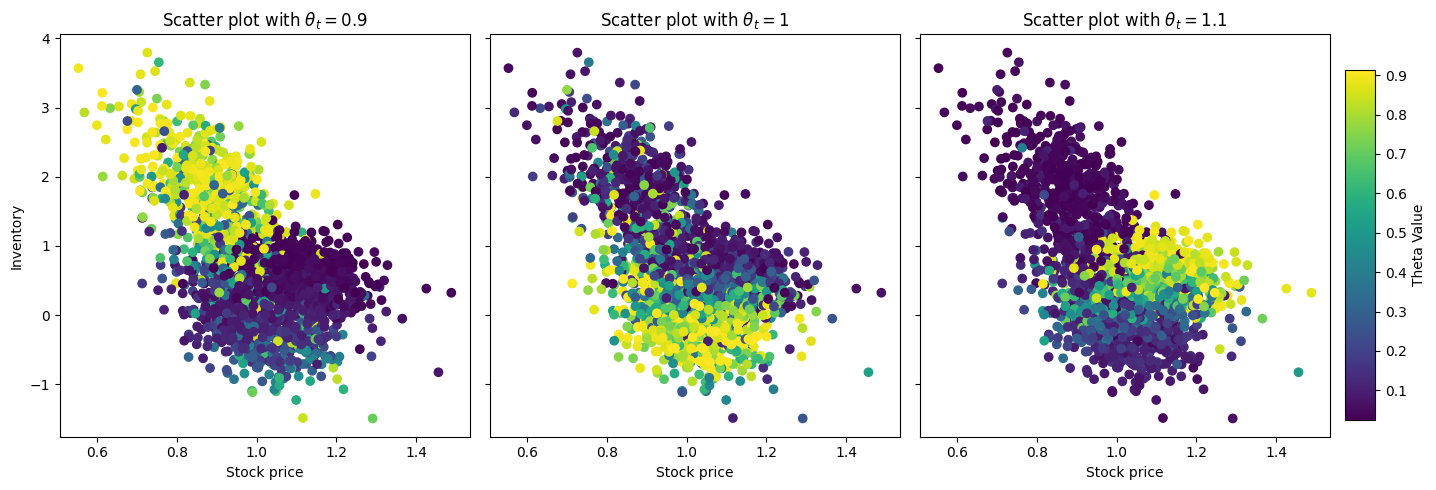

In [57]:
theta2 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob-all-pmt-chnge/just_k/theta_post.npy')
S2 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob-all-pmt-chnge/just_k/S.npy')
I2 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob-all-pmt-chnge/just_k/I.npy')
# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Create scatter plots
sc1 = axs[0].scatter(S2[:,10:].flatten(), I2[:, 12:].flatten(), c=theta2[:, 0])
axs[0].set_xlabel('Stock price')
axs[0].set_ylabel('Inventory')
axs[0].set_title(r'Scatter plot with $\theta_t = 0.9$')

sc2 = axs[1].scatter(S2[:,10:].flatten(), I2[:, 12:].flatten(), c=theta2[:, 1])
axs[1].set_xlabel('Stock price')
axs[1].set_title(r'Scatter plot with $\theta_t = 1$')

sc3 = axs[2].scatter(S2[:,10:].flatten(), I2[:, 12:].flatten(), c=theta2[:, 2])
axs[2].set_xlabel('Stock price')
axs[2].set_title(r'Scatter plot with $\theta_t = 1.1$')

# Adjust layout to make room for the colorbar
plt.subplots_adjust(right=0.85)

# Create a single colorbar
cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(sc1, cax=cbar_ax)
cbar.set_label('Theta Value')

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])

# Show the plot
plt.show()

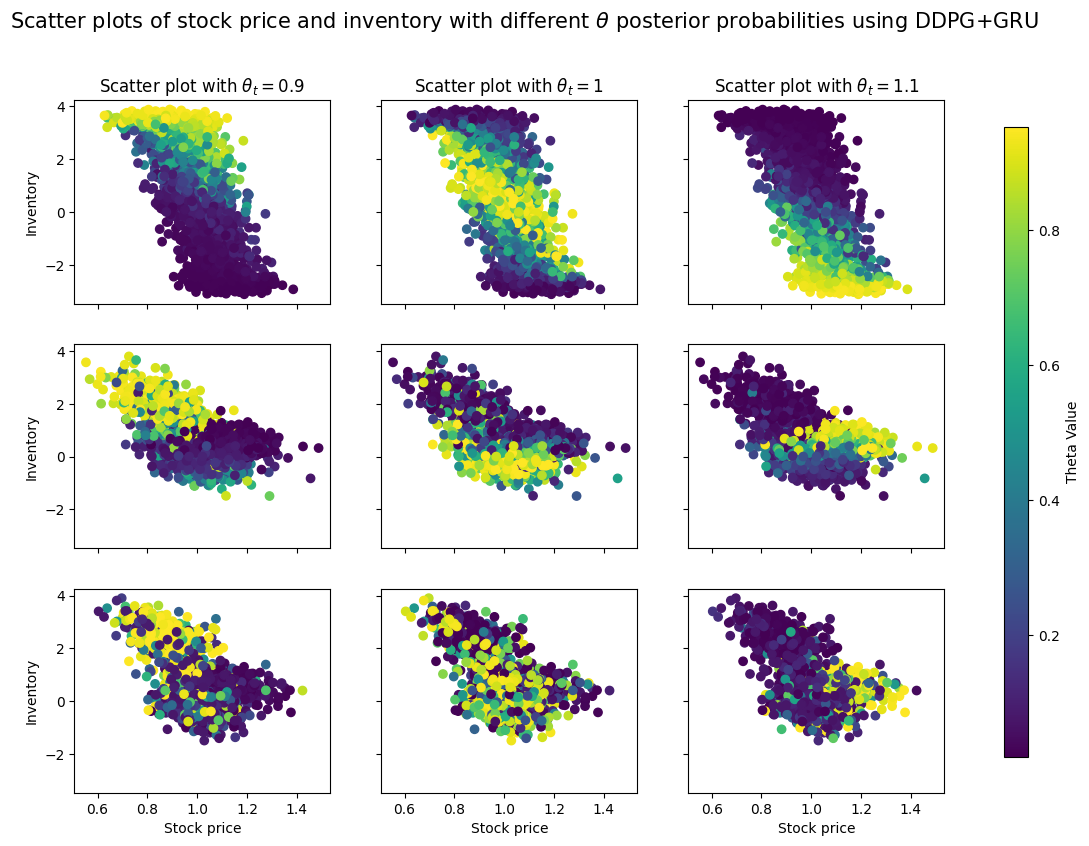

: 

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Load your data
theta1 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob/theta_post.npy')
S1 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob/S.npy')
I1 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob/I.npy')

theta2 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob-all-pmt-chnge/just_k/theta_post.npy')
S2 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob-all-pmt-chnge/just_k/S.npy')
I2 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob-all-pmt-chnge/just_k/I.npy')

theta3 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob-all-pmt-chnge/both_k_sigma/theta_post.npy')
S3 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob-all-pmt-chnge/both_k_sigma/S.npy')[:,:-10]
I3 = np.load('C:/Users/macri/Desktop/ddpg-stat-arb/model-prob-all-pmt-chnge/both_k_sigma/I.npy')[:,:-10]

# Create a figure with 3x3 subplots
fig, axs = plt.subplots(3, 3, figsize=(12, 9), sharey=True, sharex=True)

# Titles for each column
titles = [r'Scatter plot with $\theta_t = 0.9$', r'Scatter plot with $\theta_t = 1$', r'Scatter plot with $\theta_t = 1.1$']

# Plotting
for i in range(3):
    axs[0, i].scatter(S1[:, 10:].flatten(), I1[:, 12:].flatten(), c=theta1[:, i])
    axs[1, i].scatter(S2[:, 10:].flatten(), I2[:, 12:].flatten(), c=theta2[:, i])
    axs[2, i].scatter(S3[:, 10:].flatten(), I3[:, 12:].flatten(), c=theta3[:, i])
    axs[2, i].set_xlabel('Stock price')  # Set x-label for bottom row
    axs[0, i].set_title(titles[i])  # Set title for top row

# Set y-labels for each row
axs[0, 0].set_ylabel('Inventory')
axs[1, 0].set_ylabel('Inventory')
axs[2, 0].set_ylabel('Inventory')

# Create a single colorbar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(axs[0, 0].collections[0], cax=cbar_ax)
cbar.set_label('Theta Value')

# Adjust layout
#plt.tight_layout(rect=[0, 0, 0.9, 1])

fig.suptitle(r'Scatter plots of stock price and inventory with different $\theta$ posterior probabilities using DDPG+GRU', fontsize = 15)

# Show the plot
plt.show()
